## Shopkeeper for COuntry 

In [2]:
# 🛠 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Step 2: Dataset Overview
# 📥 Load the dataset
df = pd.read_csv(r"C:/Users/LENOVO/Desktop/Shopkeeper/online_retail.csv", encoding='ISO-8859-1')  # adjust encoding if needed

# 👀 Display the first few rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.columns



Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
#  Step 3: Missing Values and Duplicates
# Check the shape of the dataset
print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")

Total Rows: 541909, Total Columns: 8


In [6]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# Check basic statistics
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2023-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


## Step 4: Handling Cancelled & Invalid Transactions

In [9]:
# Pehle negative ya zero Quantity aur UnitPrice ko hata do
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [10]:
# Missing value count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [11]:
# Drop rows where CustomerID is missing
df = df.dropna(subset=['CustomerID'])

In [12]:
df['CustomerID'].isnull().sum()  # should now return 0

0

In [13]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [80]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
MonthYear      0
dtype: int64

# Step 5: Add a Total Amount Column

In [15]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Step 6: Country-wise Transaction Volume

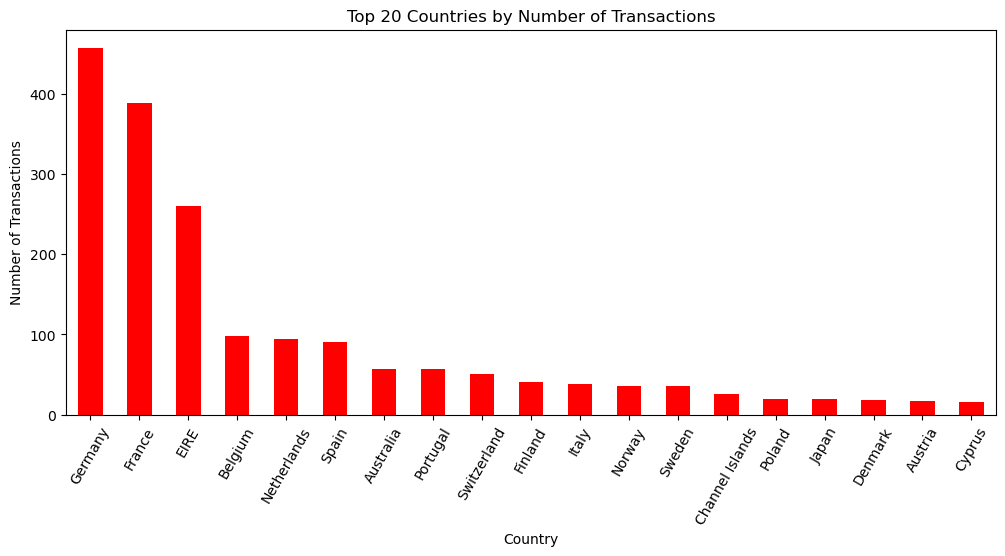

In [17]:
country_sales = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12,5))
country_sales[1:20].plot(kind="bar", color='red')  # Exclude top one (usually 'United Kingdom')
plt.title('Top 20 Countries by Number of Transactions')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=60)
plt.show()


### Step 7: Top Selling Products

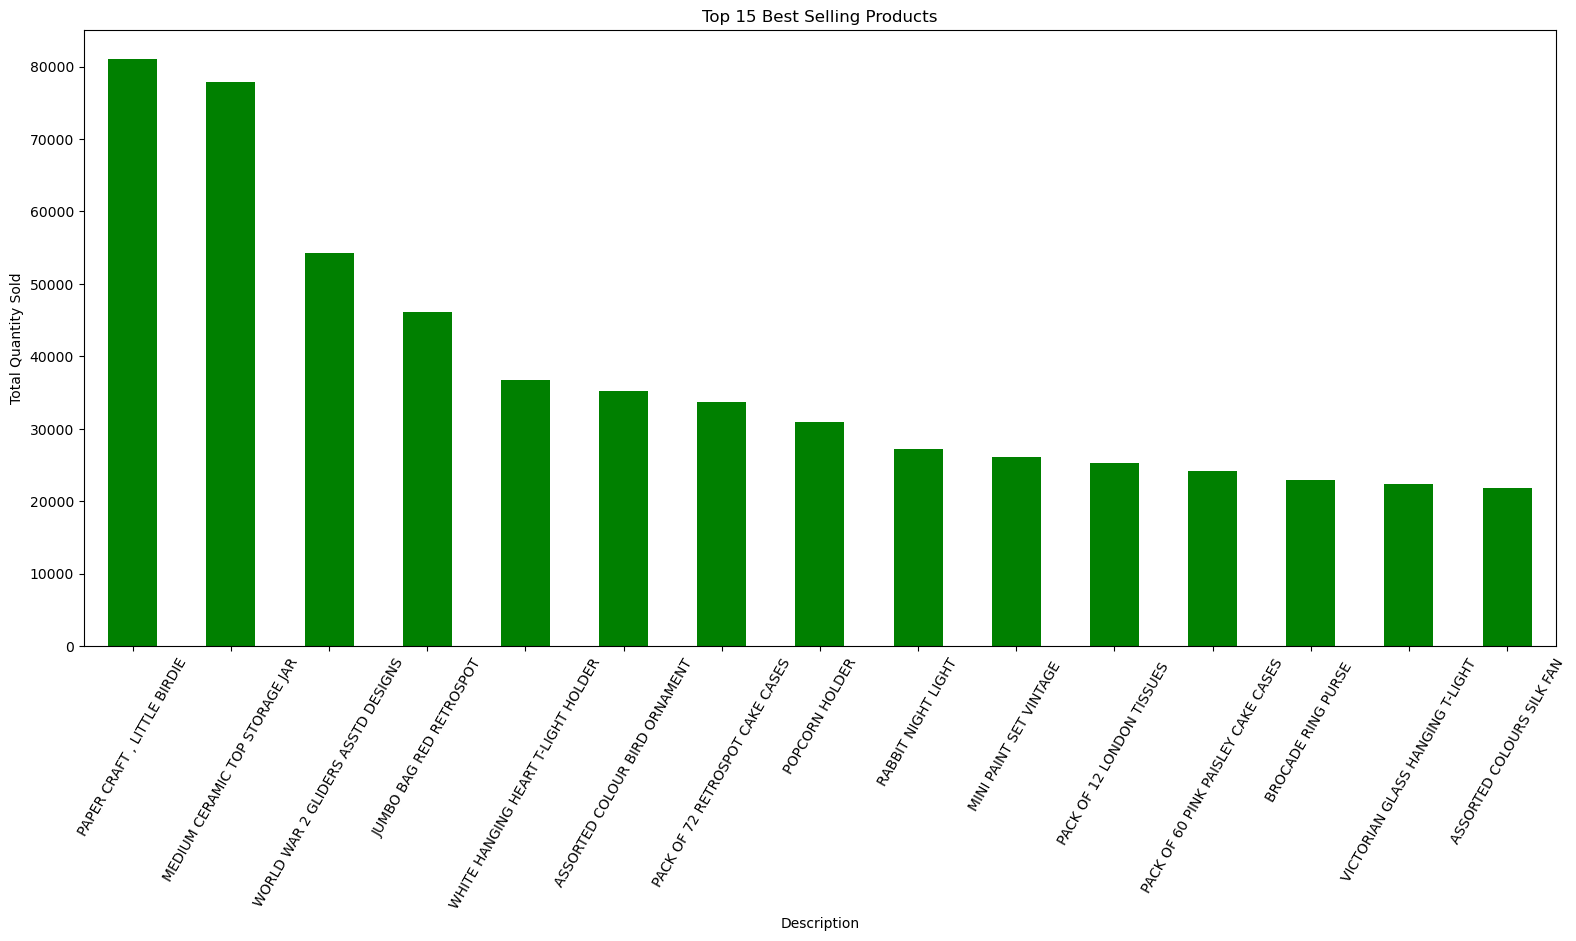

In [19]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(19,8))
top_products.plot(kind='bar', color='green')
plt.title('Top 15 Best Selling Products')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=60)
plt.show()


## Step 8: Monthly Sales Trends

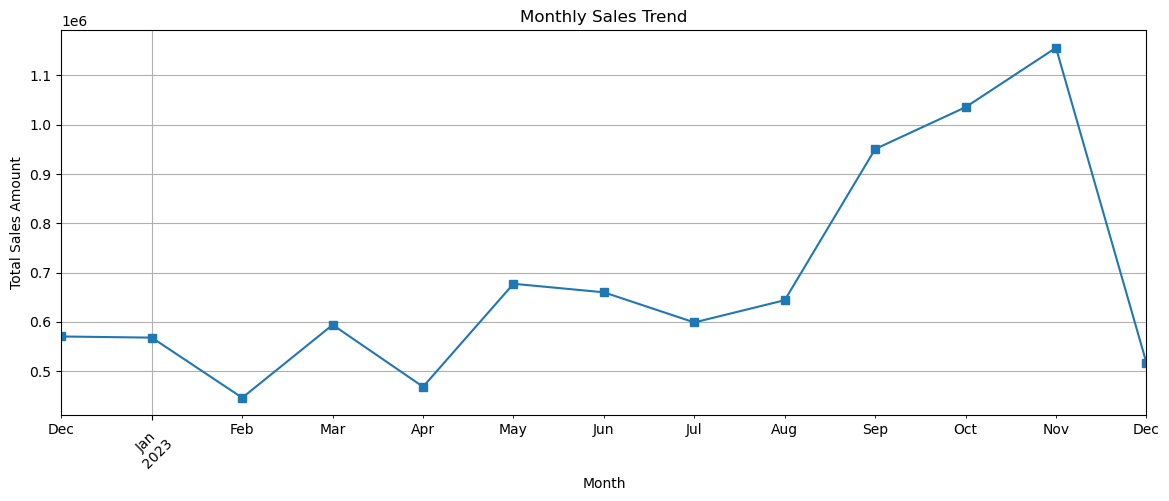

In [21]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert to datetime (bahut important)
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')  # Month-Year banana

df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby('MonthYear')['TotalAmount'].sum()

plt.figure(figsize=(14,5))
monthly_sales.plot(marker='s')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales Amount')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Step 9: Distribution of Transaction Values

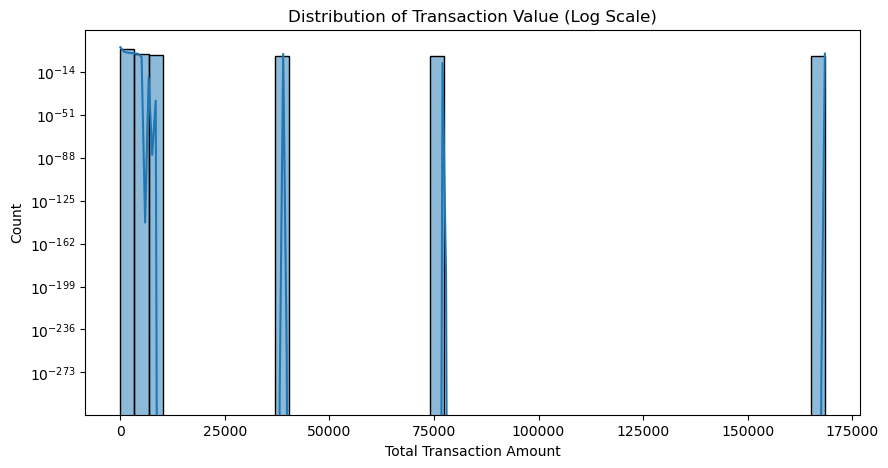

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['TotalAmount'], bins=50, kde=True)
plt.yscale('log')  # this line changes Y-axis to log scale
plt.title('Distribution of Transaction Value (Log Scale)')
plt.xlabel('Total Transaction Amount')
plt.show()


In [24]:
print("Negative TotalAmount count:", (df['TotalAmount'] < 0).sum())

Negative TotalAmount count: 0


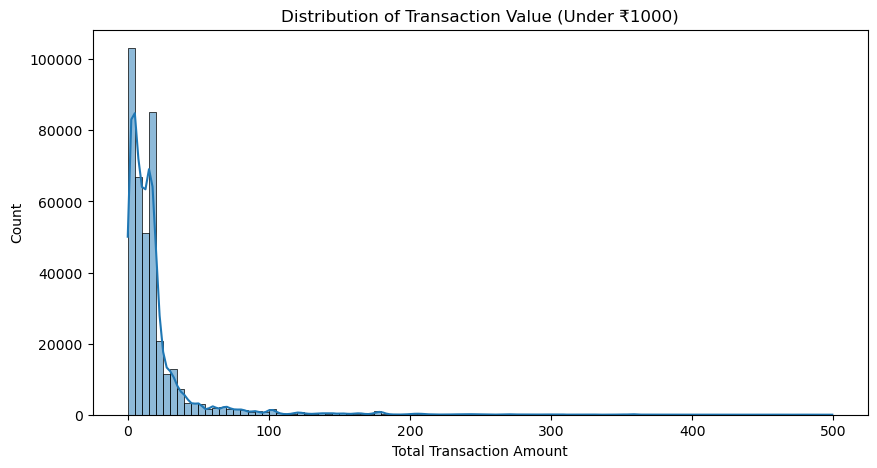

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['TotalAmount'] < 500]['TotalAmount'], bins=100, kde=True)
plt.title('Distribution of Transaction Value (Under ₹1000)')
plt.xlabel('Total Transaction Amount')
plt.show()

In [26]:
df['TotalAmount'].describe()

count    392692.000000
mean         22.631500
std         311.099224
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

## Graph: Distribution Under ₹100

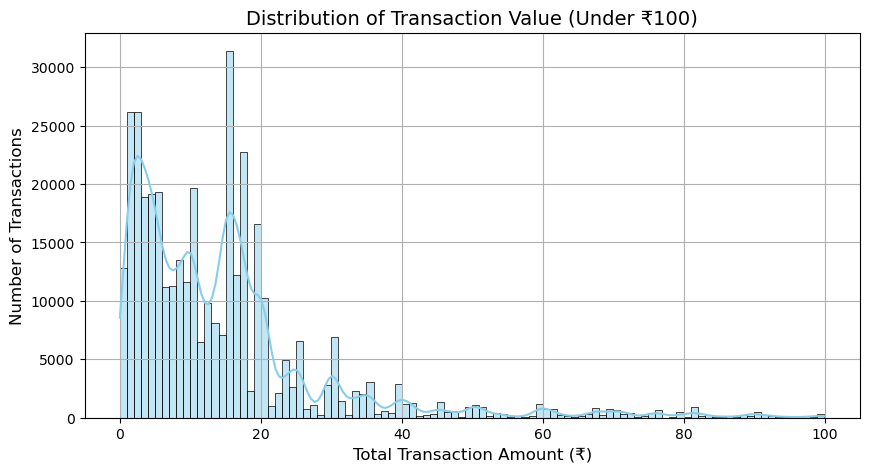

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['TotalAmount'] < 100]['TotalAmount'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Transaction Value (Under ₹100)', fontsize=14)
plt.xlabel('Total Transaction Amount (₹)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(True)
plt.show()

## Graph: Distribution Under ₹20

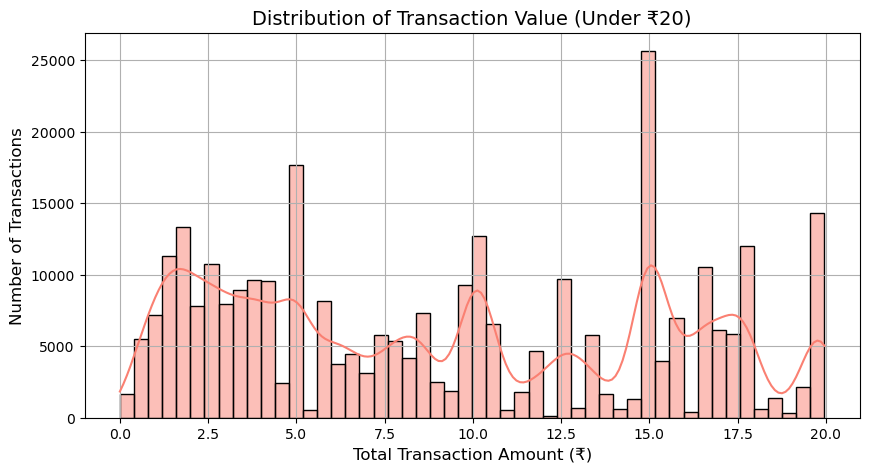

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['TotalAmount'] < 20]['TotalAmount'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Transaction Value (Under ₹20)', fontsize=14)
plt.xlabel('Total Transaction Amount (₹)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(True)
plt.show()

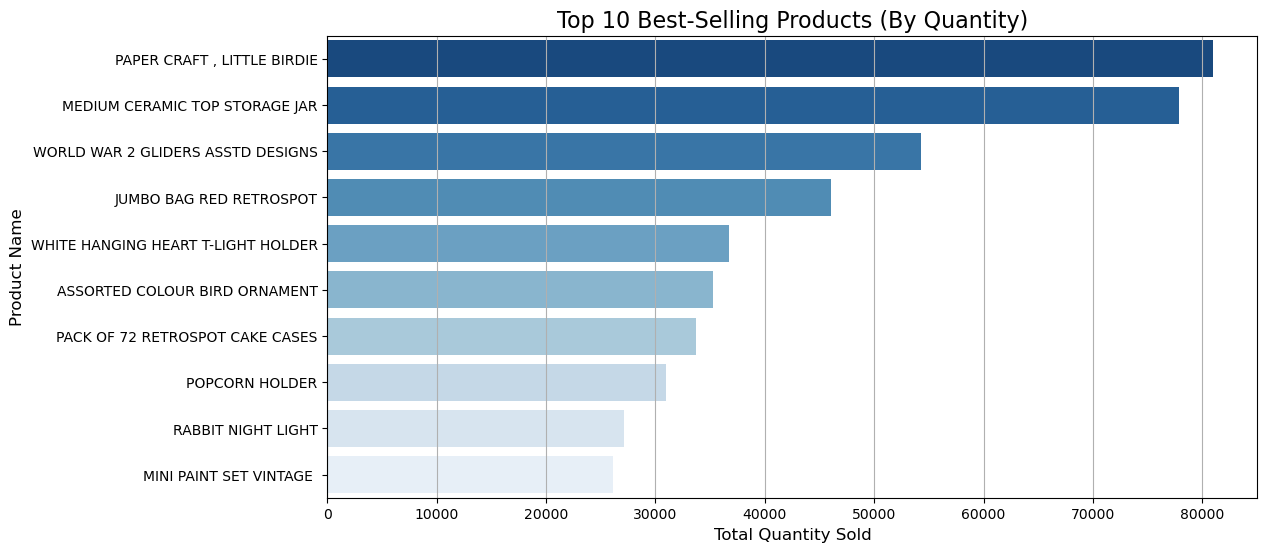

In [31]:
# Top 10 products based on total quantity sold
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_r')
plt.title('Top 10 Best-Selling Products (By Quantity)', fontsize=16)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.grid(axis='x')
plt.show()

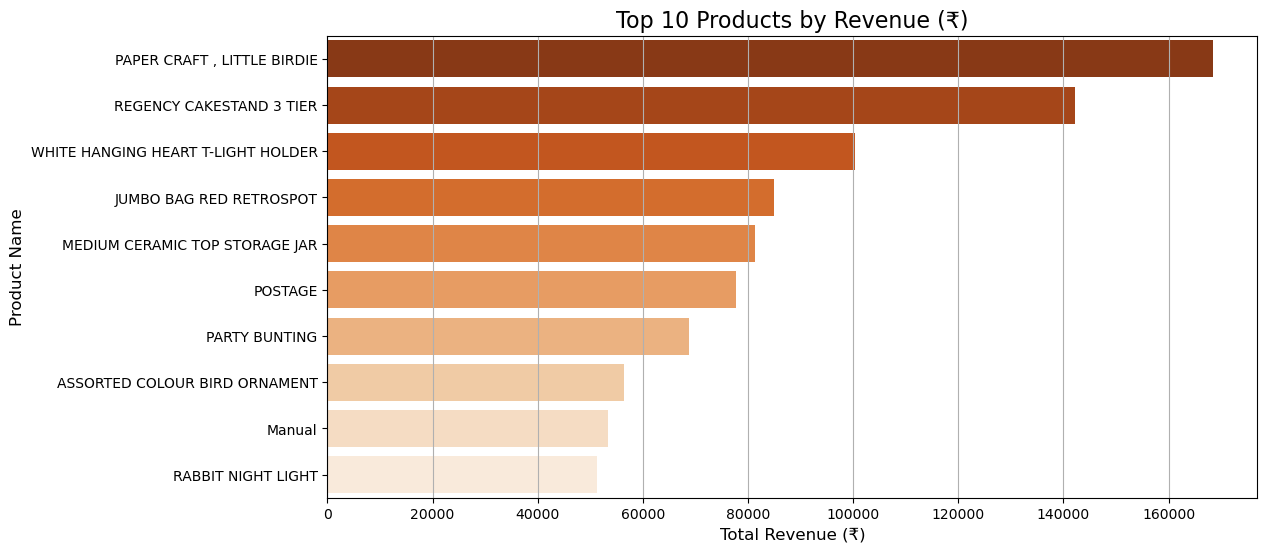

In [32]:
# Top 10 products based on total revenue
top_revenue_products = df.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index, palette='Oranges_r')
plt.title('Top 10 Products by Revenue (₹)', fontsize=16)
plt.xlabel('Total Revenue (₹)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.grid(axis='x')
plt.show()

# RFM Analysis Kya Hota Hai?
RFM = Recency, Frequency, Monetary

Ye 3 cheezein batati hain har customer ke baare me:

Metric	Matlab	Poochta Kya Hai?

Recency (R)	Last purchase kab kiya?	❓ "Kitna recent customer active tha?"

Frequency (F)	Kitni baar kharida?	❓ "Kitna regular customer hai?"

Monetary (M)	Kitna paisa kharch kiya?	❓ "Kitna revenue diya customer ne?"

🎯 Goal:
Har customer ko score dena R, F, M pe

Fir unko segment karna jaise:

🎯 High-Value

🔄 Regular

😴 At-Risk

❌ Lost/One-time buyer

📦 Example:
CustomerID	Recency	Frequency	Monetary
12345	5 days	10 orders	₹2,000
67890	90 days	1 order	₹300

🧠 Pehla customer recent bhi hai, regular bhi hai, paisa bhi diya — High-Value

Dusra customer kab ka gaya hua hai — At-Risk ya Lost

📊 Business Me RFM Kyu Zaroori Hai?

Use Case	Kya Hota Hai?

🎯 Targeted Marketing	Har customer ke liye alag offer

🛒 Personalized Selling	High-value pe premium recommend karo

💔 Retention Program	At-Risk ko win-back offers bhejo

💰 Revenue Focus	Paisa dene wale par zyada focus karo


### Step 1: Sabse recent date nikalo (jaise "today" ka reference)

In [35]:
# Latest invoice date from dataset
latest_date = df['InvoiceDate'].max()
print("Reference date for Recency:", latest_date)

Reference date for Recency: 2023-12-09 12:50:00


In [36]:
# Group by CustomerID (RFM Features banao)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                 # Frequency
    'TotalAmount': 'sum'                                    # Monetary
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


In [37]:
rfm.describe()
# rfm.isnull().sum()


,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,91.536422,4.272015,2048.688081
std,1721.808492,100.014169,7.697998,8985.230220
min,12346.000000,0.000000,1.000000,3.750000
25%,13813.250000,17.000000,1.000000,306.482500
50%,15299.500000,50.000000,2.000000,668.570000
75%,16778.750000,141.000000,5.000000,1660.597500
max,18287.000000,373.000000,209.000000,280206.020000


In [38]:

rfm.isnull().sum()


CustomerID    0
Recency       0
Frequency     0
Monetary      0
dtype: int64

In [39]:
# Recency Score (lower is better, so we reverse it with qcut rank)
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=[4, 3, 2, 1])

# Frequency Score
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4])

# Monetary Score
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=4, labels=[1, 2, 3, 4])


In [40]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,1,7,4310.00,4,4,4
2,12348.0,74,4,1797.24,2,3,4
3,12349.0,18,1,1757.55,3,1,4
4,12350.0,309,1,334.40,1,1,2


In [41]:
# RFM Segment Code as string (e.g., "434", "231")
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# RFM Score (Sum of 3 parts — numeric value)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)


In [42]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,12346.0,325,1,77183.60,1,1,4,114,6
1,12347.0,1,7,4310.00,4,4,4,444,12
2,12348.0,74,4,1797.24,2,3,4,234,9
3,12349.0,18,1,1757.55,3,1,4,314,8
4,12350.0,309,1,334.40,1,1,2,112,4


In [43]:
#🔥 Optional: Customer Segment Labels
def segment(x):
    if x >= 9:
        return 'High-Value'
    elif x >= 6:
        return 'Regular'
    elif x >= 4:
        return 'Occasional'
    else:
        return 'At-Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(segment)


In [44]:
rfm[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,91.536422,4.272015,2048.688081
std,100.014169,7.697998,8985.230220
min,0.000000,1.000000,3.750000
25%,17.000000,1.000000,306.482500
50%,50.000000,2.000000,668.570000
75%,141.000000,5.000000,1660.597500
max,373.000000,209.000000,280206.020000


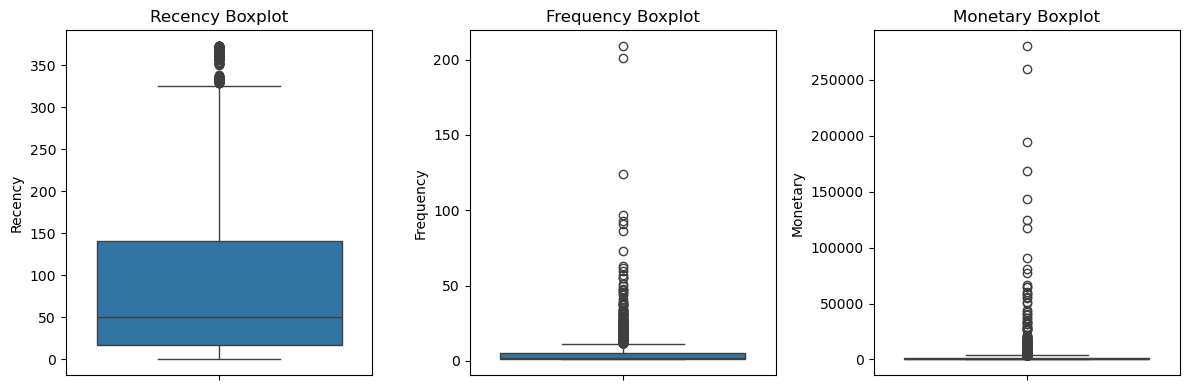

In [45]:
plt.figure(figsize=(12,4))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=rfm[col])
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

<Axes: >

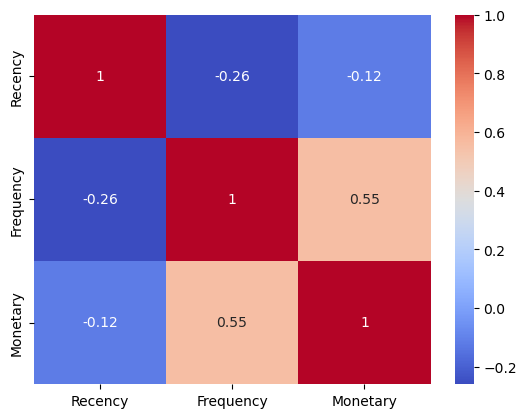

In [46]:
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm')


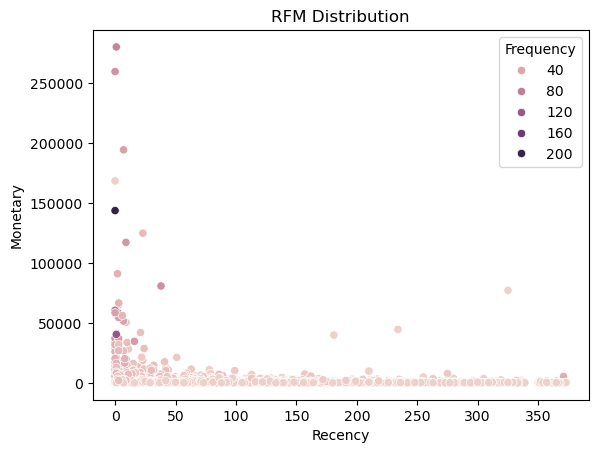

In [47]:
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Frequency')
plt.title("RFM Distribution")
plt.show()


In [48]:
rfm['Monetary'] = np.log1p(rfm['Monetary'])
rfm['Frequency'] = np.log1p(rfm['Frequency'])
rfm['Recency'] = np.log1p(rfm['Recency'])

In [49]:
# Select only numeric RFM columns
rfm_numeric = rfm[['Recency', 'Frequency', 'Monetary']]

# Apply scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
rfm_scaled = scaler.fit_transform(rfm_numeric)

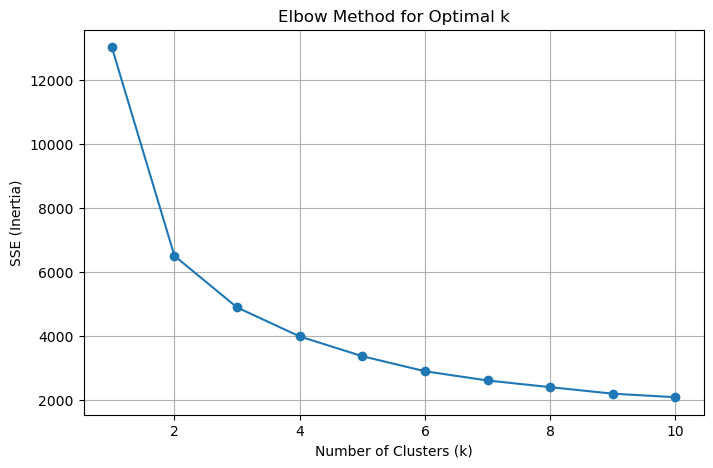

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different values of k (1 to 10)
sse = []  # Sum of squared distances (inertia)
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [51]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [52]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
rfm.groupby('Cluster')[rfm.select_dtypes(include='number').columns].mean()

,CustomerID,Recency,Frequency,Monetary,RFM_Score,Cluster
Cluster,,,,,,
0,15399.687268,2.593885,1.085251,6.078283,7.729295,0.0
1,15347.060292,4.998778,0.815218,5.597751,4.623630,1.0
2,15214.689684,3.942474,1.590298,7.268592,8.952579,2.0
3,15221.741606,1.895273,2.494951,8.372990,11.662774,3.0


In [53]:
# Suggested Labels You Can Assign:
cluster_labels = {
    0: "New Customers",
    1: "Low Value / At Risk",
    2: "Potential Loyalists",
    3: "Champions"
}

rfm['Segment'] = rfm['Cluster'].map(cluster_labels)


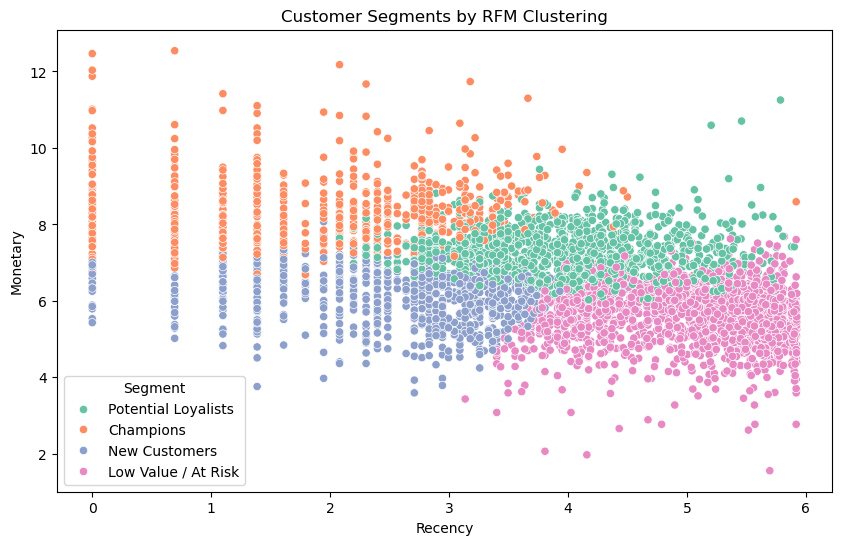

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set2')
plt.title('Customer Segments by RFM Clustering')
plt.show()

📊 How to Read This RFM Segmentation Plot
You're plotting Recency (X-axis) vs Monetary (Y-axis), with colors showing different segments (clusters):

Segment	Behavior
🟧 Champions	High spenders, very recent activity → prime customers to reward!
🟢 Potential Loyalists	Decent spenders, not the most recent → could become loyal with engagement
🔵 New Customers	Recent buyers, moderate spending → need nurturing
🟣 Low Value / At Risk	Older activity, lower spend → re-engagement or let go

✅ What's Good:
Clear cluster separation — especially Champions vs At Risk

Data scaled properly (since Recency & Monetary values are normalized)

You've successfully mapped Cluster → Segment and visualized it



What You Can Do Next:
📦 1. Export to CSV

In [57]:
rfm.to_csv('rfm_clustered_segments.csv', index=False)

In [58]:
rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().round(2)


,Recency,Frequency,Monetary
Segment,,,
Champions,1.90,2.49,8.37
Low Value / At Risk,5.00,0.82,5.60
New Customers,2.59,1.09,6.08
Potential Loyalists,3.94,1.59,7.27


🎯 3. Marketing Strategy Ideas

Segment	Action Ideas

Champions	 Loyalty rewards, early access to new launches

Potential Loyalists	Win-back emails, special discounts

New Customers	Onboarding series, trust-building campaigns

Low Value / At Risk	Re-engagement campaigns or exclude from marketing spend


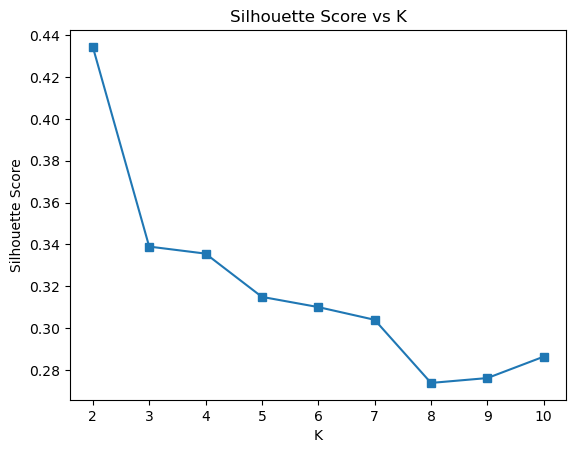

In [61]:
from sklearn.metrics import silhouette_score
sil = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    sil.append(silhouette_score(rfm_scaled, labels))

plt.plot(range(2, 11), sil, marker='s')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')
plt.show()

### Now, let's train the final KMeans model with k=4, assign labels, and save the model:
🧠 Final Model Training + Saving (K=4)

In [82]:
# Let's assume the best K was found to be 4
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

###  Label the clusters based on RFM averages

In [85]:
# Check average RFM values per cluster
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
print(cluster_summary)


         Recency  Frequency  Monetary
Cluster                              
0            2.6        1.1       6.1
1            5.0        0.8       5.6
2            3.9        1.6       7.3
3            1.9        2.5       8.4


### 🔍 Now manually label each cluster based on these averages:

In [88]:
# Map labels based on logic
cluster_labels = {
    0: 'High-Value',     # You choose this by interpreting the avg values
    1: 'Regular',
    2: 'Occasional',
    3: 'At-Risk'
}

rfm['Segment'] = rfm['Cluster'].map(cluster_labels)



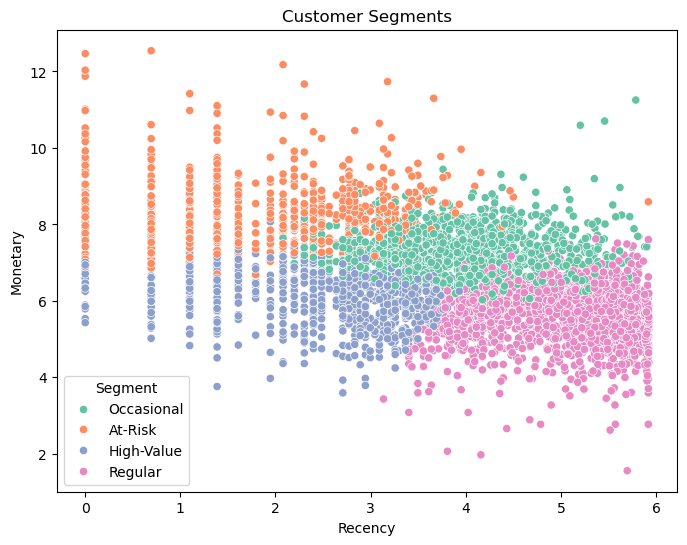

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set2')
plt.title('Customer Segments')
plt.show()


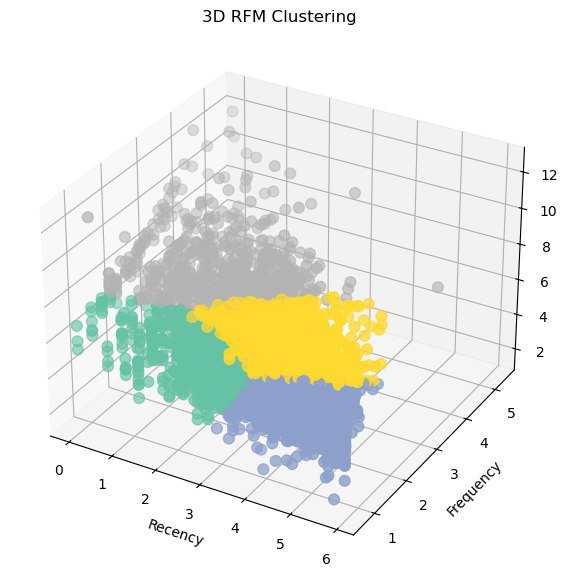

In [92]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], 
           c=rfm['Cluster'], cmap='Set2', s=60)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D RFM Clustering')
plt.show()


###  Save the KMeans model and scaler for Streamlit use


In [95]:
import joblib

# Save the trained model
joblib.dump(kmeans, 'kmeans_rfm_model.pkl')

# Save the scaler too (very important!)
joblib.dump(scaler, 'rfm_scaler.pkl')

# Save the labeled RFM dataframe (optional)
rfm.to_csv('rfm_segmented.csv', index=False)


#Optional: Load Later in Streamlit

# In your Streamlit app
import joblib
import pandas as pd

kmeans = joblib.load('kmeans_rfm_model.pkl')
scaler = joblib.load('rfm_scaler.pkl')

new_data = pd.read_csv('new_rfm_data.csv')  # Your incoming customer data
scaled_data = scaler.transform(new_data)

clusters = kmeans.predict(scaled_data)